#   Exploratory Data Analysis (EDA) - Ames Housing dataset


Un EDA, o Análisis Exploratorio de Datos, es una fase crucial en cualquier proyecto de Machine Learning. En resumen, es el proceso de investigar y comprender los datos con los que trabajamos antes de aplicar cualquier modelo predictivo o algoritmo de machine learning.
Este notebook contiene la estructura básica de un EDA aplicado al Ames Housing dataset.

El dataset **[Ames Housing dataset](https://www.kaggle.com/competitions/home-data-for-ml-course)** se obtuvo de Kaggle, de Prices Competition for Kaggle Learn Users. Dicho dataset consta de 79 variables que describen varios aspectos de las casas residenciales en Ames, Iowa.

### Objetivo
 Se plantea hacer un breve EDA del dataset, limpiando los datos faltantes y analizando las variables que podrían tener más relevancia en la predicción de la variable ```SalePrice``` (Precio en dólares de cada propiedad).

## Carga de archivos en dataframes

El dataset contiene 3 archivos de datos csv: "train.csv", "test.csv" y "sample_submission.csv".

El archivo "test.csv" (junto al archivo "sample_submission.csv") debería dejarse de lado, ya que se debería usar para el testeo de un modelo predictivo de machine learning.

Por lo tanto, el archivo "train.csv" es el archivo que voy a usar para el EDA. En dicho archivo están contenidos los datos con sus atributos, incluido el precio 'SalePrice'.

In [1]:
import pandas as pd
import numpy as np

## Información del archivo "train.csv"
df_train=pd.read_csv('dataset/train.csv')
print(df_train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD   

In [2]:
print(df_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
print(df_train.describe())

                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ..

"train.csv" tiene 80 columnas, de distintos dtype, numericos (enteros y flotantes) y strings.
Primer columna es el ID (dtype: entero) y el resto son atributos.

Redefino la variable 'MSSubClass' como Categórica.

In [4]:
df_train.MSSubClass = df_train.MSSubClass.astype('str')

In [5]:
df_train.MSSubClass

0       60
1       20
2       60
3       70
4       60
        ..
1455    60
1456    20
1457    70
1458    20
1459    20
Name: MSSubClass, Length: 1460, dtype: object

In [6]:
df_train.drop(columns='Id',inplace=True)

## Análisis de variables numéricas

In [7]:
Num_columns = df_train.select_dtypes(np.number).columns
print('Num_columns = ',Num_columns)

Num_columns =  Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')


#### Distribución de `SalePrice` usando histogramas.

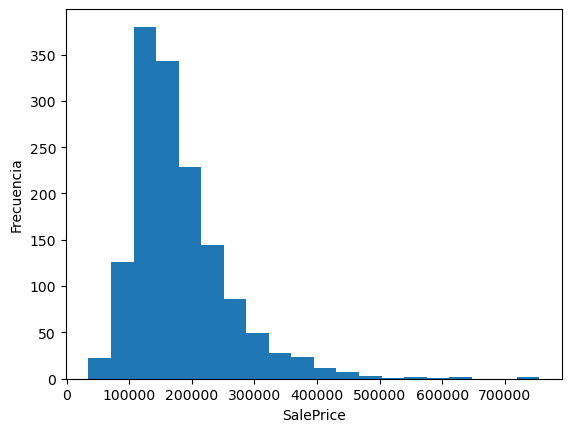

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.hist(df_train['SalePrice'], bins=20, histtype='bar', orientation='vertical')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()

La distribución tiene skewness hacia la derecha, por lo que conviene normalizar para que mejore la performance de los algoritmos.

##### Medidas estadísticas como media, mediana, rango intercuartil, etc.

In [9]:
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

### Análisis multivariable


##### Matriz de correlación para identificar relaciones entre `SalePrice` y otras variables numéricas.

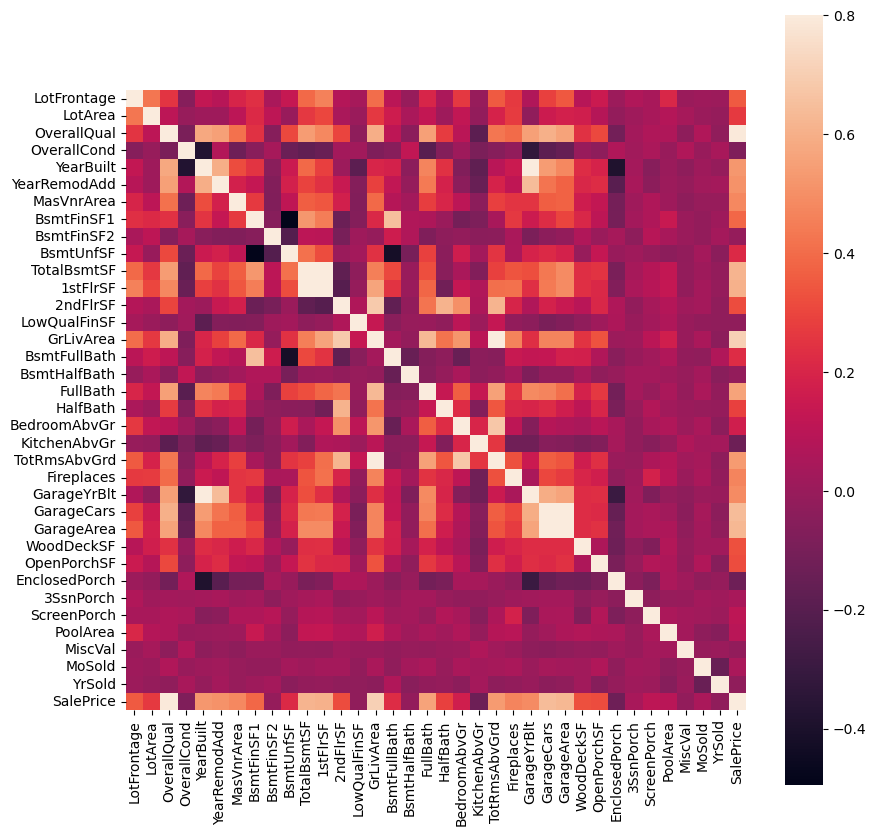

In [10]:
import seaborn as sns
import numpy as np

#correlation matrix
corrmat = df_train[Num_columns].corr()
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Podemos ver atributos que presentan multicolinearidad. Es decir, presentan alta correlación entre sí. 
Por ejemplo: GarageArea y GarageCars. Esto es porque las variables están muy correlacionadas entre sí, aportan prácticamente la misma información. Esto pasa entre los siguientes pares de variables:
* GarageYrBlt y YearBuilt, 
* TotRmsAbvGrd y GrLivArea, 
* 1stFlrSF y TotalBsmtSF,
* GarageArea y GarageCars.

En los casos en que se considere que esta correlación indique que los pares de variables aportan prácticamente la misma información, hay una de las variables que sobra, y podría quitarse. En el caso de GargeArea y GarageCars, podriamos quedarnos con GarageCars y eliminar la columna GarageArea.

De cada par, voy a eliminar el que tenga menor correlación con 'SalePrice'.


In [11]:
# correlación con SalePrice, en orden descendente
print(corrmat.loc['SalePrice'].abs().sort_values(ascending=False)[1:])

OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
KitchenAbvGr     0.135907
EnclosedPorch    0.128578
ScreenPorch      0.111447
PoolArea         0.092404
OverallCond      0.077856
MoSold           0.046432
3SsnPorch        0.044584
YrSold           0.028923
LowQualFinSF     0.025606
MiscVal          0.021190
BsmtHalfBath     0.016844
BsmtFinSF2       0.011378
Name: SalePrice, dtype: float64


In [12]:
# me quedo con las columnas con una correlación mayor a 0.5 y sin considerar las variables con multicolinearidad (de cada par,
# elimino la de menor coeficiente de correlación).
Selected_Num = ['SalePrice','OverallQual','GrLivArea','GarageCars', 'TotalBsmtSF','FullBath','YearBuilt','YearRemodAdd']

In [13]:
df_train[Selected_Num]

,SalePrice,OverallQual,GrLivArea,GarageCars,TotalBsmtSF,FullBath,YearBuilt,YearRemodAdd
0,208500,7,1710,2,856,2,2003,2003
1,181500,6,1262,2,1262,2,1976,1976
2,223500,7,1786,2,920,2,2001,2002
3,140000,7,1717,3,756,1,1915,1970
4,250000,8,2198,3,1145,2,2000,2000
...,...,...,...,...,...,...,...,...
1455,175000,6,1647,2,953,2,1999,2000
1456,210000,6,2073,2,1542,2,1978,1988
1457,266500,7,2340,1,1152,2,1941,2006
1458,142125,5,1078,1,1078,1,1950,1996


Reescaleo las variables 'YearBuilt' y 'YearRemodAdd' con 'YrSold':

In [14]:
df_train['YearBuilt'] = df_train['YrSold']-df_train['YearBuilt']
df_train['YearRemodAdd'] = df_train['YrSold']-df_train['YearRemodAdd']

##### Visualización de la dependencia de `SalePrice` respecto a cada una de las variables numéricas de mayor correlación

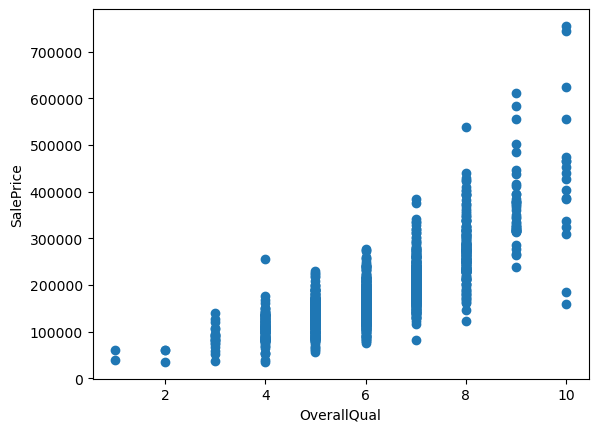

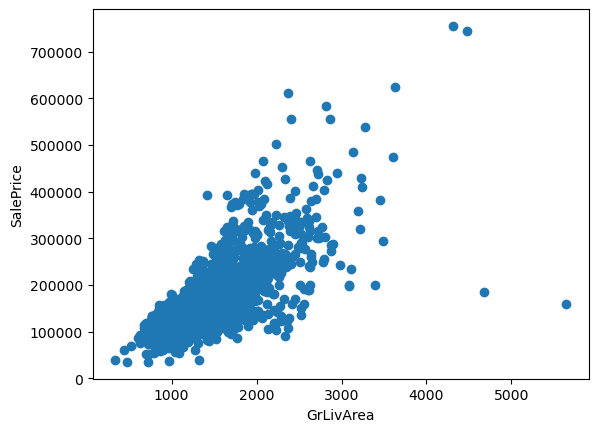

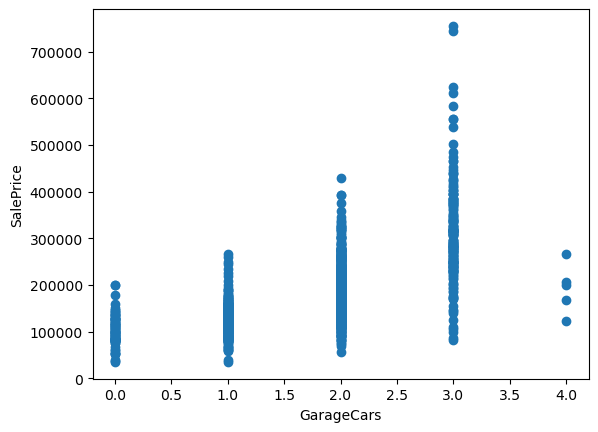

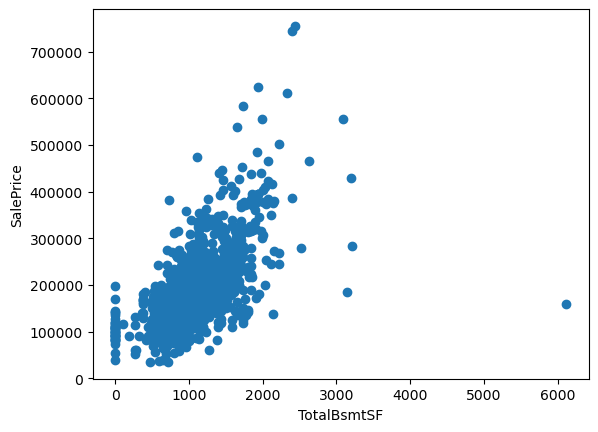

In [15]:
plt.scatter(df_train['OverallQual'],df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('OverallQual')
plt.show()

plt.scatter(df_train['GrLivArea'],df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GrLivArea')
plt.show()

plt.scatter(df_train['GarageCars'],df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('GarageCars')
plt.show()

plt.scatter(df_train['TotalBsmtSF'],df_train['SalePrice'])
plt.ylabel('SalePrice')
plt.xlabel('TotalBsmtSF')
plt.show()


## Análisis de variables categóricas

In [16]:
Cat_columns = df_train.select_dtypes(include='O').columns

In [17]:
Cat_columns

Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')

In [18]:
df_train[Cat_columns].nunique()

MSSubClass       15
MSZoning          5
Street            2
Alley             2
LotShape          4
LandContour       4
Utilities         2
LotConfig         5
LandSlope         3
Neighborhood     25
Condition1        9
Condition2        8
BldgType          5
HouseStyle        8
RoofStyle         6
RoofMatl          8
Exterior1st      15
Exterior2nd      16
MasVnrType        3
ExterQual         4
ExterCond         5
Foundation        6
BsmtQual          4
BsmtCond          4
BsmtExposure      4
BsmtFinType1      6
BsmtFinType2      6
Heating           6
HeatingQC         5
CentralAir        2
Electrical        5
KitchenQual       4
Functional        7
FireplaceQu       5
GarageType        6
GarageFinish      3
GarageQual        5
GarageCond        5
PavedDrive        3
PoolQC            3
Fence             4
MiscFeature       4
SaleType          9
SaleCondition     6
dtype: int64

In [19]:
df_train[Cat_columns]

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,20,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,60,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,70,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,60,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,70,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,20,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


En base a la descripción de las variables, grafico algunas variables categóricas, que supongo que pueden tener correlación con SalePrice:

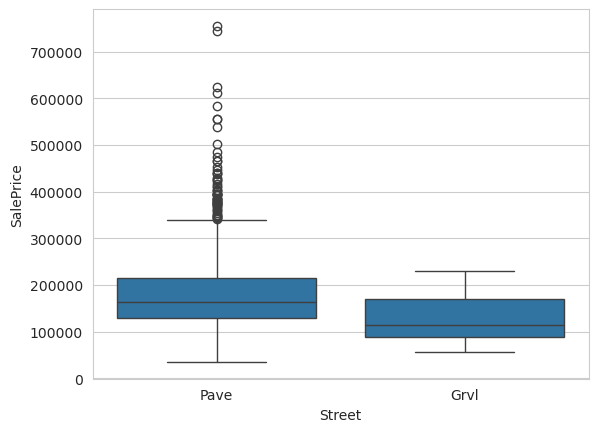

In [20]:
sns.set_style('whitegrid')
sns.boxplot(data=df_train,x='Street',y='SalePrice')
plt.show()

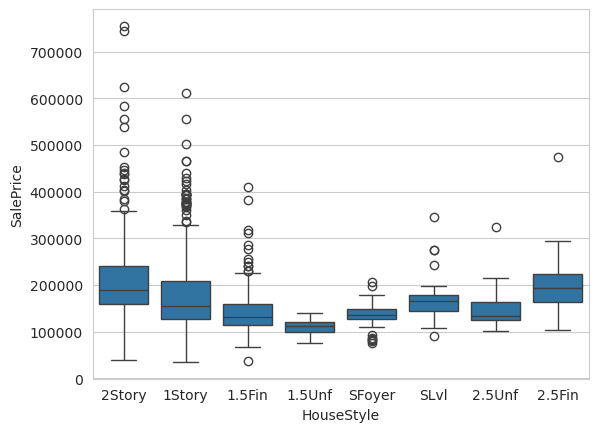

In [21]:
sns.set_style('whitegrid')
sns.boxplot(data=df_train,x='HouseStyle',y='SalePrice')
plt.show()

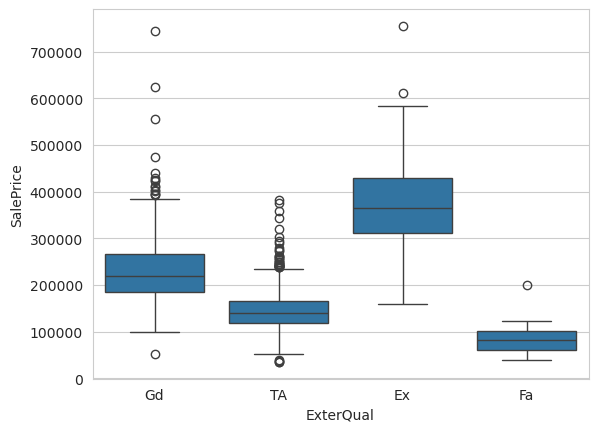

In [22]:
sns.set_style('whitegrid')
sns.boxplot(data=df_train,x='ExterQual',y='SalePrice')
plt.show()

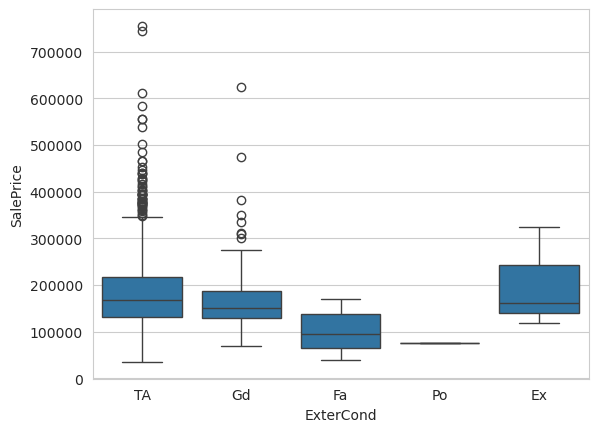

In [23]:
sns.set_style('whitegrid')
sns.boxplot(data=df_train,x='ExterCond',y='SalePrice')
plt.show()

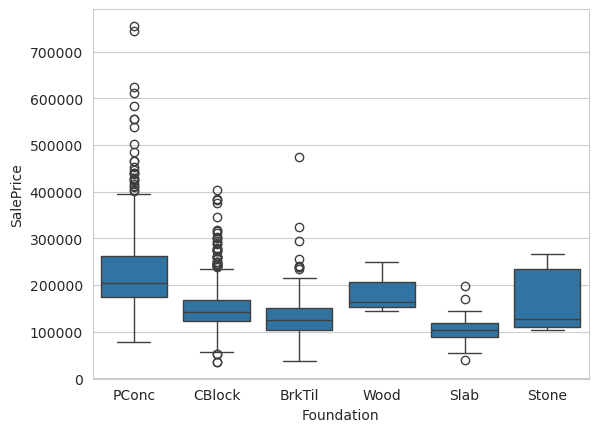

In [24]:
sns.set_style('whitegrid')
sns.boxplot(data=df_train,x='Foundation',y='SalePrice')
plt.show()

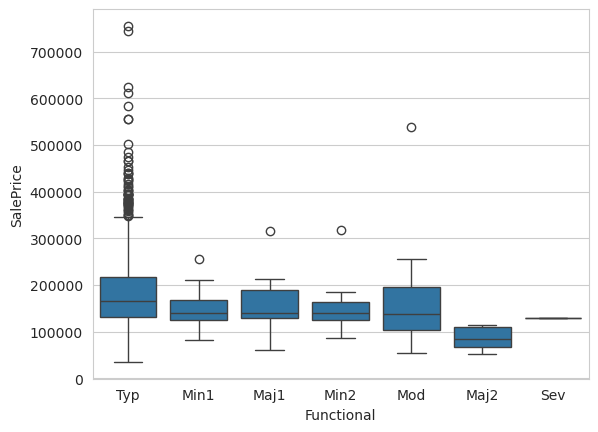

In [25]:
sns.set_style('whitegrid')
sns.boxplot(data=df_train,x='Functional',y='SalePrice')
plt.show()

## Limpieza de valores nulos.

In [26]:
# se cuentan la cantidad de columnas donde hay valores nulos, por tipo de variable:
print('# columnas numericas con NaN =  ',(df_train[Num_columns].isnull().sum() > 0).sum())
print('# columnas categóricas con NaN =',(df_train[Cat_columns].isnull().sum() > 0).sum())

# columnas numericas con NaN =   3
# columnas categóricas con NaN = 16


In [27]:
# porcentaje de valores nulos por columna
N=df_train.shape[0]
print((df_train.isnull().sum().sort_values(ascending=False)/N*100).iloc[:20])

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageYrBlt      5.547945
GarageCond       5.547945
GarageType       5.547945
GarageFinish     5.547945
GarageQual       5.547945
BsmtExposure     2.602740
BsmtFinType2     2.602740
BsmtCond         2.534247
BsmtQual         2.534247
BsmtFinType1     2.534247
MasVnrArea       0.547945
Electrical       0.068493
MSSubClass       0.000000
dtype: float64


In [28]:
# cantidad filas con más del 20% de valores nulos
N=df_train.shape[1]
(df_train.isnull().sum(axis=1)/N*100 > 20).sum()

np.int64(0)

In [29]:
# cantidad de valores nulos en la columna "SalePrice"
print(df_train.isnull().sum()['SalePrice'])

0


SalePrice no tiene valores nulos.

In [30]:
# se eliminan las columnas con muchos valores nulos
df_train=df_train.drop(columns=['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','MasVnrType'])
print(df_train.isnull().sum().sort_values(ascending=False).iloc[0:15])

LotFrontage     259
GarageYrBlt      81
GarageCond       81
GarageType       81
GarageFinish     81
GarageQual       81
BsmtFinType2     38
BsmtExposure     38
BsmtQual         37
BsmtFinType1     37
BsmtCond         37
MasVnrArea        8
Electrical        1
TotRmsAbvGrd      0
KitchenQual       0
dtype: int64


se mantuvo la variable 'LotFrontage' (longitud frontal de la propiedad) porque se presume que puede estar correlacionada con SalePrice. 

In [31]:
# para variables numéricas, se reemplazan los valores nulos por el valor medio
Num_columns = df_train.select_dtypes(include=np.number).columns
df_train[Num_columns] = df_train[Num_columns].fillna(df_train[Num_columns].median())
print('# columnas numericas con NaN = ',(df_train[Num_columns].isnull().sum() > 0).sum()) # chequeo

# columnas numericas con NaN =  0


In [32]:
# para variables categoricas, se reemplazan los valores nulos por la etiqueta 'Unknown'
Cat_columns = df_train.select_dtypes(include='O').columns
df_train[Cat_columns] = df_train[Cat_columns].fillna('Unknown')
print('# columnas Categoricas con NaN = ',(df_train[Cat_columns].isnull().sum() > 0).sum()) # chequeo

# columnas Categoricas con NaN =  0


## One-Hot Encoding

Ahora que ya tengo el DataFrame limpio, aplico One-Hot Encoding para pasar los features categóricos a numéricos:

In [33]:
OHE = pd.get_dummies(df_train.select_dtypes(include='O'), drop_first=True).astype('Int16')
OHE.head()

,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0


Ahora junto las features numéricas con las nuevas features del OHE.

In [34]:
df_train = pd.concat([df_train.select_dtypes(include=np.number),OHE],axis=1)

In [35]:
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,5,5,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,31,31,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,7,6,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,91,36,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,8,8,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


## Feature Selection

In [36]:
Y = np.log10(df_train.SalePrice)
X = df_train.drop(columns='SalePrice')

Selecciono primero las features con mayor correlación con SalePrice.

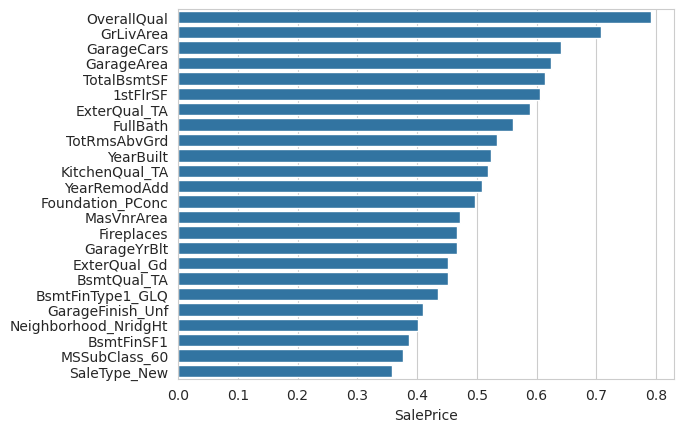

In [37]:
corrmat = df_train.corr()
df = corrmat.SalePrice.abs().sort_values(ascending=False).iloc[1:25]
sns.barplot(df,orient='y')
plt.show()

Ahora calculo el coeficiente mutual information, para evaluar correlaciones no lineales.

In [38]:
from sklearn.feature_selection import mutual_info_regression
mi = mutual_info_regression(X,Y)

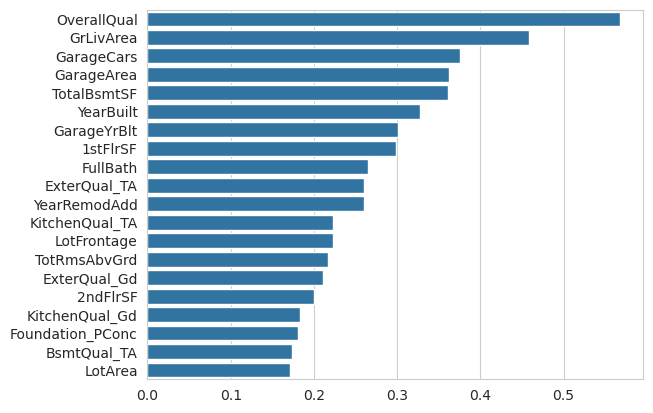

In [39]:
mi_df = pd.Series(mi, index=X.columns).sort_values(ascending=False)

sns.barplot(mi_df.iloc[:20],orient='y')
plt.show()

Las principales features coinciden con el coeficiente de correlación.

Selecciono las primeras 10 features con mayor mutual information.

In [40]:
fs = mi_df.iloc[:10].index
print(fs)

Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF',
       'YearBuilt', 'GarageYrBlt', '1stFlrSF', 'FullBath', 'ExterQual_TA'],
      dtype='object')


Veamos ahora si existe multicolinearidad entre features.

Con la matriz de correlación identifico relaciones lineales entre las features.

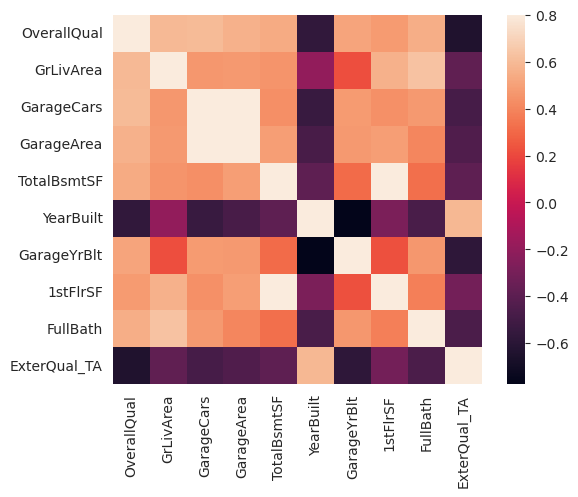

In [41]:
#correlation matrix
corrmat = X[fs].corr()
#f, ax = plt.subplots()
sns.heatmap(corrmat, vmax=.8, square=True);
plt.show()

Podemos ver atributos que presentan multicolinearidad. Es decir, presentan alta correlación entre sí. 
Por ejemplo: GarageArea y GarageCars. Esto es porque las variables están muy correlacionadas entre sí, aportan prácticamente la misma información. Esto pasa entre los siguientes pares de variables:
* GarageYrBlt y YearBuilt, 
* TotRmsAbvGrd y GrLivArea, 
* 1stFlrSF y TotalBsmtSF,
* GarageArea y GarageCars.

En los casos en que se considere que esta correlación indique que los pares de variables aportan prácticamente la misma información, hay una de las variables que sobra, y podría quitarse. En el caso de GarageArea y GarageCars, podriamos quedarnos con GarageCars y eliminar la columna GarageArea.

De cada par, voy a eliminar el que tenga menor correlación con 'SalePrice'.


In [42]:
# De cada par, me quedo con la feature de mayor coeficiente de correlación.
fs = ['OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF','YearBuilt', 'FullBath']

## Escaleado

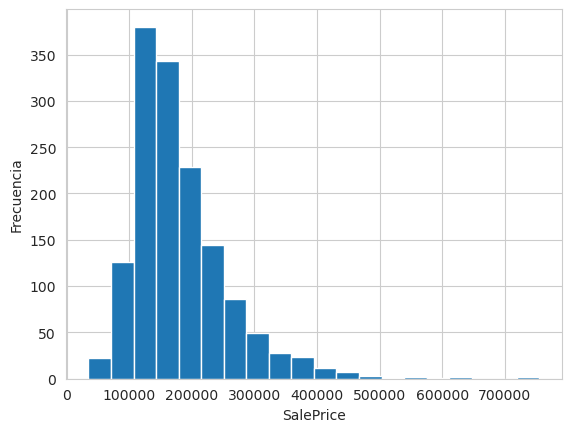

In [43]:
plt.hist(df_train['SalePrice'], bins=20, histtype='bar', orientation='vertical')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()

In [44]:
df_train.columns[np.std(df_train, axis=0) < 0.01]

Index([], dtype='object')

In [45]:
Y = np.log10(df_train.SalePrice)
X = df_train.drop(columns='SalePrice')

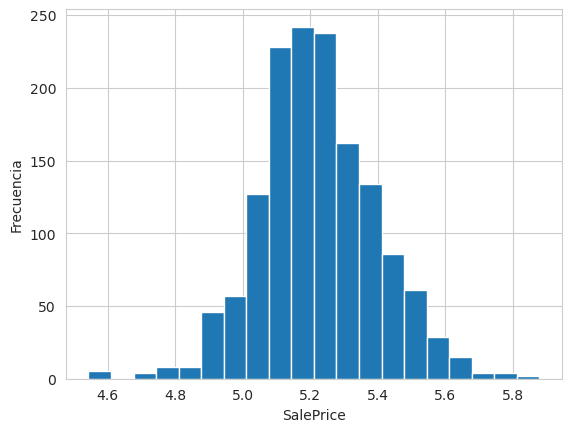

In [46]:
plt.hist(Y, bins=20, histtype='bar', orientation='vertical')
plt.xlabel('SalePrice')
plt.ylabel('Frecuencia')
plt.show()

In [47]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [48]:
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled,columns=X.columns)

## Regresión Lineal

### Con todas las features:

Empiezo haciendo una regresión lineal, usando todas las features y buscando las variables que mejor predigan SalePrice.

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score,cross_validate

model = LinearRegression()
CV = cross_validate(model,X_scaled,Y,cv=10,scoring='r2',return_train_score=True)

print('train : ',CV['train_score'].mean().round(4),(CV['train_score'].std()/CV['train_score'].mean()*100).round(2),'%')
print('test : ',CV['test_score'].mean().round(4),(CV['test_score'].std()/CV['test_score'].mean()*100).round(2),'%')

train :  0.9463 0.29 %
test :  -8.768049029754658e+20 -157.27 %


Usando todas las variables, la predicción de SalePrice es de muy baja calidad.

Ahora hago un gráfico de SalePrice real vs predicho:

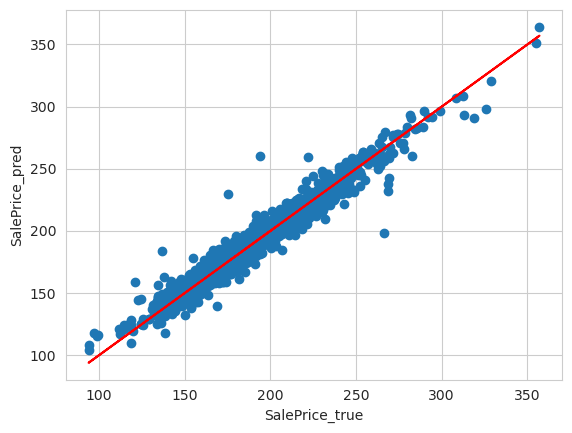

In [50]:
model = LinearRegression().fit(X_scaled,Y)
Y_pred = model.predict(X_scaled)

plt.scatter(np.exp(Y),np.exp(Y_pred))
plt.plot(np.exp(Y),np.exp(Y),c='red')
plt.xlabel('SalePrice_true')
plt.ylabel('SalePrice_pred')
plt.show()

## Regresión Lineal, sólo con las features seleccionadas

In [51]:
model = LinearRegression()
CV = cross_validate(model,X_scaled[fs],Y,cv=10,scoring='r2',return_train_score=True)

print('train : ',CV['train_score'].mean().round(4),(CV['train_score'].std()/CV['train_score'].mean()*100).round(2),'%')
print('test : ',CV['test_score'].mean().round(4),(CV['test_score'].std()/CV['test_score'].mean()*100).round(2),'%')

train :  0.8124 0.99 %
test :  0.7975 11.63 %


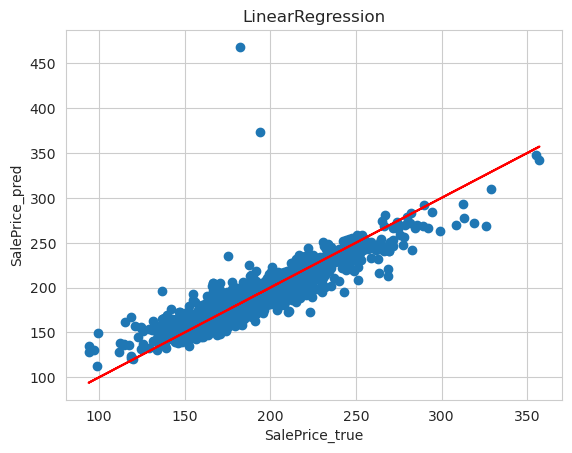

In [59]:
model = LinearRegression().fit(X[fs],Y)
Y_pred = model.predict(X[fs])

plt.scatter(np.exp(Y),np.exp(Y_pred))
plt.plot(np.exp(Y),np.exp(Y),c='red')
plt.xlabel('SalePrice_true')
plt.ylabel('SalePrice_pred')
plt.title('LinearRegression')
plt.show()

## Regresión Polinomial, con las features seleccionadas

In [53]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_validate

In [60]:
scores = []
for N in range(5):
    poly = PolynomialFeatures(degree=N)
    X_poly = poly.fit_transform(X_scaled[fs])
    model = LinearRegression()
    CV = cross_validate(model,X_poly,Y,cv=10,scoring='r2',return_train_score=True)
    scores.append([N,CV['train_score'].mean(),CV['test_score'].mean()])

df_scores = pd.DataFrame(scores)

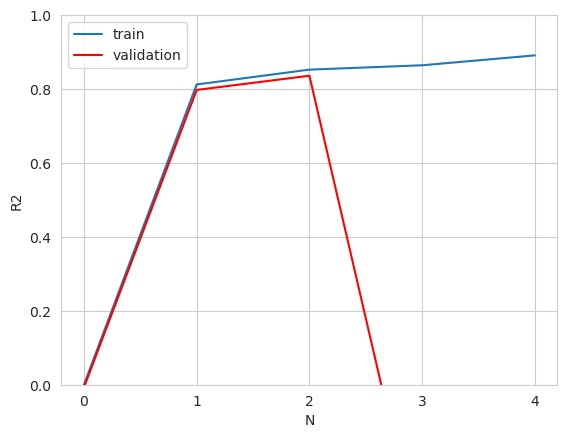

In [63]:
plt.plot(df_scores.iloc[:,0],df_scores.iloc[:,1])
plt.plot(df_scores.iloc[:,0],df_scores.iloc[:,2],c='red')
plt.legend(['train','validation'])
plt.ylabel('R2')
plt.xlabel('N')
plt.xticks([0,1,2,3,4])
plt.ylim([0,1])
plt.grid('on')
plt.show()

Vemos que el ajuste con polinomio de 2do orden es el que da el mejor R2. Sin embargo el ajuste lineal (polinomio de 1er orden) da resultados bastante buenos también.
A partir de N=3 se observa overfitting.

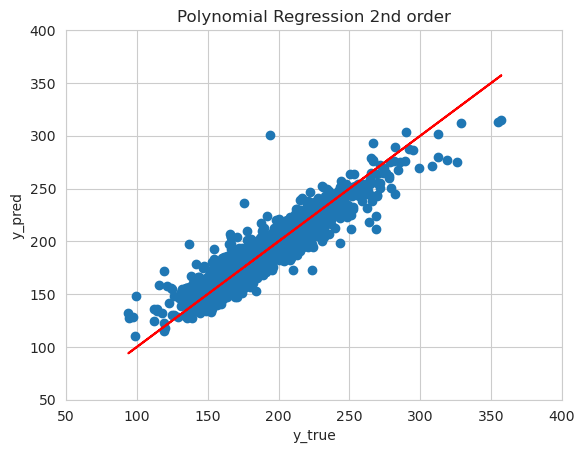

In [64]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled[fs])
model = LinearRegression().fit(X_poly,Y)
Y_pred = model.predict(X_poly)

plt.scatter(np.exp(Y),np.exp(Y_pred))
plt.plot(np.exp(Y),np.exp(Y),c='red')
plt.xlabel('y_true')
plt.ylabel('y_pred')
plt.ylim([50,400])
plt.xlim([50,400])
plt.title('Polynomial Regression 2nd order')
plt.show()

Finalmente, sería interesante calcular el R2 usando los datos de testing.

## Conclusiones:
* Se puede concluir que las variables de mayor correlación con SalePrice son: 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'YearBuilt' y 'FullBath'.
* Por lo tanto, estas variables son las más útiles para generar un modelo predictivo de la variable SalePrice.
* Las variables que poseen un coeficiente de correlación cercano a cero no serían útiles para predecir SalePrice, por que fueron descartadas.
* La regresión polinómica de segundo orden permite obtener el mayor R2=0,81, sin embargo con la regresión lineal también se obtiene un R2 elevado.
* A partir de regresión polinómica de 3er orden se observa overfitting.
* Al haber una relación entre variables fundamentalmente lineal, la correlación 'mutual information' da prácticamente la misma información que el coeficiente de correlación.